In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import random

import sys
from Bio import Entrez

In [40]:
driver_map_data_all_df = pd.read_csv('DriverMapTPM.tsv',delimiter='\t')

driver_map_data_all_df = driver_map_data_all_df.set_index('Unnamed: 0')
# columns: 
#['A10', 'A11', 'A12', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 
# 'B10', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9']
driver_map_data_all_df.head()

,A10,A11,A12,A2,A3,A4,A5,A6,A7,A8,...,B11,B12,B2,B3,B4,B5,B6,B7,B8,B9
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
14266|CENPU,17.60490,23.53280,0.000,0.294876,43.10860,70.50920,21.41510,1.14305,47.16210,1.43697,...,20.49390,0.00000,0.546198,48.0853,74.59220,26.27370,1.19616,45.71820,2.83643,122.2470
13331|PEX14,19.08750,14.08670,0.000,27.671900,25.00070,17.33890,25.84810,12.43200,18.08010,10.52050,...,17.62190,0.00000,33.521000,26.2342,24.65790,36.15540,15.84860,18.20870,14.82460,34.4379
6630|RAD52,3.66106,4.29017,0.000,5.274080,6.98958,3.28098,4.90895,1.53928,5.35737,1.73986,...,6.29135,3.60232,7.170180,10.8381,6.08676,6.61974,3.46454,7.99667,2.27730,8.2883
16802|CLYBL,11.47500,12.58540,34.475,16.894700,14.28180,4.92852,30.36700,28.94250,15.52040,7.25044,...,9.44277,38.90040,11.170000,12.2971,4.87524,24.46830,21.38690,12.00770,3.81662,16.9272
6645|RANBP1,71.64050,79.22280,0.000,45.997900,218.58800,143.56100,82.09650,30.95460,70.32010,51.50090,...,66.10810,7.38547,35.480200,105.3570,93.05350,46.65610,24.73280,47.38680,41.90630,118.2290


In [41]:
# create data frame for driver map original samples 
driver_map_data_df = driver_map_data_all_df.iloc[::,]
driver_map_data_df = driver_map_data_df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12']]
driver_map_data_df.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67']

driver_map_data_df.reset_index(drop=False)

# get column names as a list
column_names = driver_map_data_df.columns.to_list()

#switch_driver_map_data_log_df


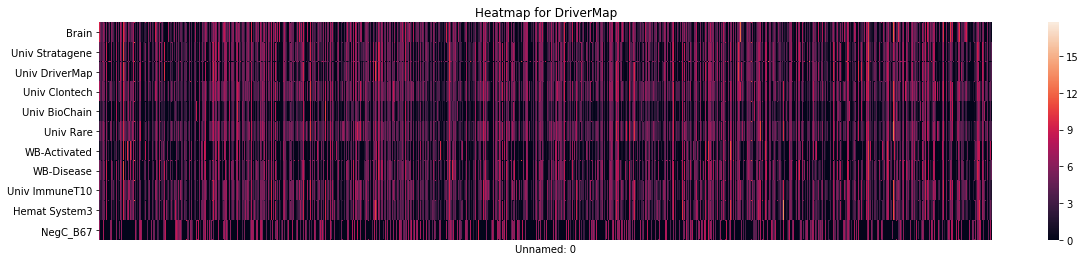

In [42]:
# convert DriverMap data into log2 functions and ignote devide by 0 error message
with np.errstate(divide='ignore'):
    driver_map_data_log_df = np.log2(driver_map_data_df)

# replace negative values with 0    
driver_map_data_log_df[driver_map_data_log_df < 0 ] = 0

#flip axis
switch_driver_map_data_log_df=driver_map_data_log_df.transpose()


plt.figure(figsize=(20,4))
sns.heatmap(switch_driver_map_data_log_df,xticklabels=False,yticklabels=True)
plt.title('Heatmap for DriverMap')

switch_driver_map_data_log_df.to_csv('DM_data_log_original.csv')


In [84]:
# operations performed to conferm that all target genes are unique values
gene_list = driver_map_data_df.index.tolist() # number of genes 18989
unique_genes = list(driver_map_data_df.index.unique())
unique_genes_split = driver_map_data_df.index.str.split('|')

#confirm that all gene names are unique
gene_name_list = [unique_genes_split[i][1] for i in range(len(unique_genes_split))]
len(np.unique(gene_name_list)) # 18989
gene_name_list

['CENPU',
 'PEX14',
 'RAD52',
 'CLYBL',
 'RANBP1',
 'KDF1',
 'TBC1D30',
 'TMEM258',
 'LRG1',
 'HYAL1',
 'DGAT2L6',
 'GAD1',
 'SRGN',
 'UBE2D1',
 'EDA',
 'PTCD2',
 'TNFSF10',
 'KIAA1107',
 'CAMKK2',
 'GRAMD4',
 'CLCN2',
 'TAF5',
 'ZNF146',
 'POLK',
 'FTCD',
 'FFAR2',
 'SNX24',
 'EIF1B',
 'BCAR3',
 'NUP58',
 'FNIP1',
 'ENPP7',
 'FER',
 'CD74',
 'CAND1',
 'KIF21B',
 'ARHGAP5',
 'APBA3',
 'CRHBP',
 'IGFBP3',
 'OR1A1',
 'TAS2R30',
 'TGIF2LY',
 'ALAD',
 'ZNF274',
 'ATP9B',
 'SOX30',
 'TPD52L1',
 'TOMM22',
 'ZNF84',
 'EPDR1',
 'RNF112',
 'KCNB2',
 'FMO5',
 'ANKRD26',
 'ARL14',
 'SPNS2',
 'AAK1',
 'KPNA1',
 'SHISA8',
 'APOBEC3B',
 'BDKRB1',
 'FOSB',
 'WLS',
 'HIST1H2BM',
 'SMAP2',
 'LOC100134391',
 'APOBEC3H',
 'FZD3',
 'MS4A4A',
 'UBTF',
 'DDHD1',
 'CD72',
 'RBM46',
 'ADAM17',
 'C3orf62',
 'NR5A1',
 'NFE2L3',
 'PPP1R12A',
 'RTN2',
 'ZCCHC13',
 'SLN',
 'PQLC2',
 'LRP12',
 'PRDM4',
 'ZNF556',
 'PPIH',
 'ADARB1',
 'APPL1',
 'RPL13A',
 'GTPBP8',
 'CYP3A7',
 'LRR1',
 'FN1',
 'VWC2',
 'CAPN7',
 'ST

In [59]:
# make gene list into better list without brackets
gene_name_list_str = str(gene_name_list).replace("[", "")
gene_name_list_str = gene_name_list_str.replace("]", "")
gene_name_list_str = gene_name_list_str.replace("'", "")
#gene_name_list = [gene_name_list_str]


In [62]:
[gene_name_list_str]

'CENPU, PEX14, RAD52, CLYBL, RANBP1, KDF1, TBC1D30, TMEM258, LRG1, HYAL1, DGAT2L6, GAD1, SRGN, UBE2D1, EDA, PTCD2, TNFSF10, KIAA1107, CAMKK2, GRAMD4, CLCN2, TAF5, ZNF146, POLK, FTCD, FFAR2, SNX24, EIF1B, BCAR3, NUP58, FNIP1, ENPP7, FER, CD74, CAND1, KIF21B, ARHGAP5, APBA3, CRHBP, IGFBP3, OR1A1, TAS2R30, TGIF2LY, ALAD, ZNF274, ATP9B, SOX30, TPD52L1, TOMM22, ZNF84, EPDR1, RNF112, KCNB2, FMO5, ANKRD26, ARL14, SPNS2, AAK1, KPNA1, SHISA8, APOBEC3B, BDKRB1, FOSB, WLS, HIST1H2BM, SMAP2, LOC100134391, APOBEC3H, FZD3, MS4A4A, UBTF, DDHD1, CD72, RBM46, ADAM17, C3orf62, NR5A1, NFE2L3, PPP1R12A, RTN2, ZCCHC13, SLN, PQLC2, LRP12, PRDM4, ZNF556, PPIH, ADARB1, APPL1, RPL13A, GTPBP8, CYP3A7, LRR1, FN1, VWC2, CAPN7, STK38L, HOXD8, ERC1, PRSS27, TSSK4, IL3RA, FMR1, RASA4B, STX2, OR4C15, ZNF718, MYEF2, FAM161B, DGKA, ECSIT, ASAP1, KXD1, STON1, MAFK, FEM1A, MYL3, CCDC142, SAMD4B, RPSAP58, EBLN2, LRRC16A, TBR1, SCRN2, GCH1, DEFB125, ENOX1, CCPG1, SMPDL3A, TUSC3, WDR38, SLX1B, DDIAS, TXNRD3NB, ZNF300, TCAF1

In [6]:
# Make DF for DriverMap original samples
driver_map_data_df = driver_map_data_all_df.iloc[::,]
driver_map_data_df = driver_map_data_df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12']]
driver_map_data_df.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67']
#driver_map_data_df.reset_index()

# convert DriverMap data into log2 functions and ignote devide by 0 error message
with np.errstate(divide='ignore'):
    driver_map_data_log_df = np.log2(driver_map_data_df)

# replace negative values with 0    
driver_map_data_log_df[driver_map_data_log_df < 0 ] = 0

min_value_list = list(driver_map_data_df.min())
max_value_list = list(driver_map_data_df.max())
mean_value_list = list(driver_map_data_df.mean())
std_value_list = list(driver_map_data_df.std())
mean_value_list = list(driver_map_data_df.mean())
median_value_list = list(driver_map_data_df.median())
q1_value_list = list(driver_map_data_df.quantile(.25))
q3_value_list = list(driver_map_data_df.quantile(.75))

described_data_log_df = pd.DataFrame(driver_map_data_log_df.describe())
flipped_described_data_log_df = described_data_log_df.transpose()
#np.array_equal(a,b)

#driver_map_data_df = driver_map_data_df.transpose()
flipped_described_data_log_df

flipped_described_data_log_df.to_csv('DM_describe_data_log_original.csv')

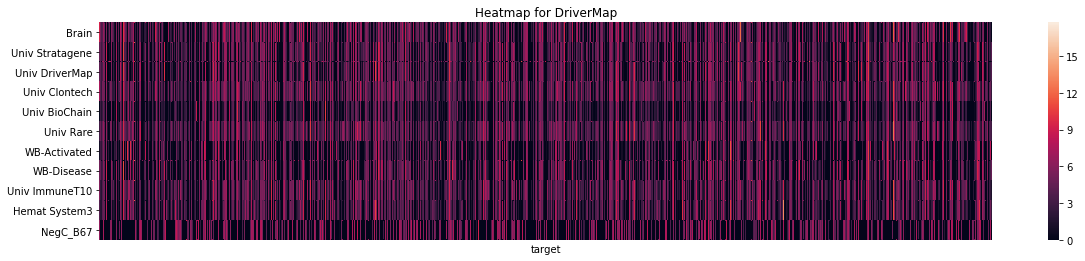

In [7]:
# Make DF for DriverMap for samples treated with BSA and 
driver_map_data_bsa_df = driver_map_data_all_df.iloc[::,-12:]
driver_map_data_bsa_df = driver_map_data_bsa_df[['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12']]
driver_map_data_bsa_df.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67']

driver_map_data_df.reset_index(drop=False)

# get column names as a list
column_names = driver_map_data_df.columns.to_list()

# convert DriverMap data into log2 functions and ignote devide by 0 error message
with np.errstate(divide='ignore'):
    driver_map_data_log_df = np.log2(driver_map_data_df)

# replace negative values with 0    
driver_map_data_log_df[driver_map_data_log_df < 0 ] = 0
    
#flip axis
switch_driver_map_data_log_df=driver_map_data_log_df.transpose()


plt.figure(figsize=(20,4))
sns.heatmap(switch_driver_map_data_log_df,xticklabels=False,yticklabels=True)
plt.title('Heatmap for DriverMap')

switch_driver_map_data_log_df.to_csv('DM_data_log_BSA.csv')

# convert DriverMap data into log2 functions and ignote devide by 0 error message
with np.errstate(divide='ignore'):
    driver_map_data_log_df = np.log2(driver_map_data_df)

# replace negative values with 0    
driver_map_data_log_df[driver_map_data_log_df < 0 ] = 0

described_data_log_df = pd.DataFrame(driver_map_data_log_df.describe())
flipped_described_data_log_df = described_data_log_df.transpose()
#np.array_equal(a,b)

#driver_map_data_df = driver_map_data_df.transpose()
flipped_described_data_log_df

flipped_described_data_log_df.to_csv('DM_describe_data_log_BSA.csv')

In [64]:
# export gene list as text file
with open("gene_list.txt", "w") as output:
    output.write(gene_name_list_str)

'CENPU'

In [23]:
id_list = gene_name_list[0:11]
gene_string = " ".join(str(x) for x in id_list)
gene_string = gene_string.replace("[", "")
gene_string = gene_string.replace("]", ",")
gene_string = gene_string.replace("'", "")
gene_string

'CENPU, PEX14, RAD52, CLYBL, RANBP1, KDF1, TBC1D30, TMEM258, LRG1, HYAL1, DGAT2L6,'

In [ ]:
api_key = 'a208a28c972d98dc6443480a1e9a9c5bf708'



In [24]:
# get dictionary of different types of tissues
import requests, sys
from pprint import pprint
 
server = "http://grch37.rest.ensembl.org"
ext = "/eqtl/tissue/homo_sapiens?"
 
r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
 
if not r.ok:
  r.raise_for_status()
  sys.exit()
 
decoded = r.json()
#pprint(decoded)


# convert dictionary to list of tissue types
dlist = []
for i in decoded.items():
    dlist.append(i)

tissue_list = []    
for i in range(len(dlist)):
    tissue_list.append(dlist[i][0])
    
print(tissue_list)


['Adipose_Visceral_Omentum', 'Nerve_Tibial', 'Brain_Cerebellar_Hemisphere', 'Ovary', 'Pancreas', 'Cells_Transformed_fibroblasts', 'Vagina', 'Small_Intestine_Terminal_Ileum', 'Lung', 'Prostate', 'Esophagus_Muscularis', 'Skin_Sun_Exposed_Lower_leg', 'Whole_Blood', 'Brain_Anterior_cingulate_cortex_BA24', 'Adipose_Subcutaneous', 'Heart_Left_Ventricle', 'Brain_Cortex', 'Esophagus_Gastroesophageal_Junction', 'Colon_Transverse', 'Cells_EBV-transformed_lymphocytes', 'Uterus', 'Skin_Not_Sun_Exposed_Suprapubic', 'Stomach', 'Brain_Hippocampus', 'Brain_Hypothalamus', 'Breast_Mammary_Tissue', 'Brain_Frontal_Cortex_BA9', 'Artery_Coronary', 'Artery_Aorta', 'Brain_Nucleus_accumbens_basal_ganglia', 'Artery_Tibial', 'Spleen', 'Esophagus_Mucosa', 'Heart_Atrial_Appendage', 'Adrenal_Gland', 'Brain_Caudate_basal_ganglia', 'Testis', 'Pituitary', 'Thyroid', 'Colon_Sigmoid', 'Brain_Cerebellum', 'Liver', 'Brain_Putamen_basal_ganglia', 'Muscle_Skeletal']


In [48]:
import requests
import sys
import xmltodict
import re

def convert_symbol_to_entrezid(symbol):
    """Convert Symbol to Entrez Gene Id"""
    entrezdict = {}
    server = "http://rest.genenames.org/fetch/symbol/{0}".format(symbol)
    r = requests.get(server, headers={"Content-Type": "application/json"})
    if not r.ok:
        r.raise_for_status()
        sys.exit()
    response = r.text
    info = xmltodict.parse(response)
    for data in info['response']['result']['doc']['str']:
        if data['@name'] == 'entrez_id':
            entrezdict[data['@name']] = data['#text']
        if data['@name'] == 'symbol':
            entrezdict[data['@name']] = data['#text']
    return entrezdict

In [70]:
i = 0
gene_name_list = gene_name_list[0:100]
conversion_pile = []
for i in range(len(gene_name_list)):
    conversion = convert_symbol_to_entrezid(gene_name_list[i])
    conversion_pile.append(conversion)
    i+=1
conversion_pile[0]

{'symbol': 'CENPU', 'entrez_id': '79682'}

In [72]:
# api for searching 
import requests, sys

gene = 'CENPU'
tissue = 'Adipose_Visceral_Omentum'
statistic = 'p-value'

server = "http://grch37.rest.ensembl.org"
ext = f"/eqtl/id/homo_sapiens/{gene}?;tissue={tissue};statistic={statistic}"
 
r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
 
if not r.ok:
  r.raise_for_status()
  sys.exit()
 
decoded = r.json()
pprint(decoded)


[{'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.364956143163666,
  'seq_region_end': '183734182',
  'seq_region_name': '4',
  'seq_region_start': '183734182',
  'snp': 'rs6827588',
  'value': 0.431562655592666},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.0223668232762906,
  'seq_region_end': '183734459',
  'seq_region_name': '4',
  'seq_region_start': '183734459',
  'snp': 'rs72693655',
  'value': 0.949802212099595},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.632929333624897,
  'seq_region_end': '183734623',
  'seq_region_name': '4',
  'seq_region_start': '183734623',
  'snp': 'rs73004729',
  'value': 0.232847010465122},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.832744485960855,
  'seq_region_end': '183734684',
  'seq_region_name': '4',
  'seq_region_start': '183734684',
  'snp': 'rs200656981',
  'value': 0.146979076415116},
 {'display_consequence': 'intergenic_varian

  'seq_region_name': '4',
  'seq_region_start': '183756095',
  'snp': 'rs72693676',
  'value': 0.951278001261296},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.5608334592913,
  'seq_region_end': '183756124',
  'seq_region_name': '4',
  'seq_region_start': '183756124',
  'snp': 'rs6857412',
  'value': 0.2748948101554},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.561136312700786,
  'seq_region_end': '183756169',
  'seq_region_name': '4',
  'seq_region_start': '183756169',
  'snp': 'rs6857935',
  'value': 0.274703180252843},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.164956846474643,
  'seq_region_end': '183756171',
  'seq_region_name': '4',
  'seq_region_start': '183756171',
  'snp': 'rs62342207',
  'value': 0.683979607308959},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.418194001857577,
  'seq_region_end': '183756580',
  'seq_region_name': '4',
  'seq_region_start': '1

  'value': 0.54258873370048},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 1.03069638156299,
  'seq_region_end': '183795687',
  'seq_region_name': '4',
  'seq_region_start': '183795687',
  'snp': 'rs60604513',
  'value': 0.093175904736155},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 1.00737964468352,
  'seq_region_end': '183796383',
  'seq_region_name': '4',
  'seq_region_start': '183796383',
  'snp': 'rs60839040',
  'value': 0.0983151294353914},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.344732016830176,
  'seq_region_end': '183797166',
  'seq_region_name': '4',
  'seq_region_start': '183797166',
  'snp': 'rs62342250',
  'value': 0.452134849957384},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.909250887106589,
  'seq_region_end': '183797523',
  'seq_region_name': '4',
  'seq_region_start': '183797523',
  'snp': 'rs62342251',
  'value': 0.123239268795886},
 {'display_cons

  'seq_region_name': '4',
  'seq_region_start': '183838924',
  'snp': 'rs34203469',
  'value': 0.753257141719143},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.531266813560094,
  'seq_region_end': '183839023',
  'seq_region_name': '4',
  'seq_region_start': '183839023',
  'snp': 'rs55890220',
  'value': 0.294261325175356},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 1.05046104663885,
  'seq_region_end': '183839072',
  'seq_region_name': '4',
  'seq_region_start': '183839072',
  'snp': 'rs61381614',
  'value': 0.0890305288963059},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.257497497184732,
  'seq_region_end': '183839454',
  'seq_region_name': '4',
  'seq_region_start': '183839454',
  'snp': 'rs58725886',
  'value': 0.552716593210654},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.571280727016012,
  'seq_region_end': '183841115',
  'seq_region_name': '4',
  'seq_region_star

  'snp': 'rs75368102',
  'value': 0.0601613903629586},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.593310056927682,
  'seq_region_end': '183889523',
  'seq_region_name': '4',
  'seq_region_start': '183889523',
  'snp': 'rs1865546',
  'value': 0.255087949674203},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.539834380502232,
  'seq_region_end': '183889631',
  'seq_region_name': '4',
  'seq_region_start': '183889631',
  'snp': 'rs1528684',
  'value': 0.288513154689313},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 1.13647926948118,
  'seq_region_end': '183889773',
  'seq_region_name': '4',
  'seq_region_start': '183889773',
  'snp': 'rs78113997',
  'value': 0.0730332673583136},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.995881472115167,
  'seq_region_end': '183890110',
  'seq_region_name': '4',
  'seq_region_start': '183890110',
  'snp': 'rs2871379',
  'value': 0.100952836951091},
 {'displ

  'seq_region_end': '183938312',
  'seq_region_name': '4',
  'seq_region_start': '183938312',
  'snp': 'rs10001824',
  'value': 0.0658053852244171},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 1.19591032833339,
  'seq_region_end': '183938402',
  'seq_region_name': '4',
  'seq_region_start': '183938402',
  'snp': 'rs6819799',
  'value': 0.0636927017884285},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 1.18959251674437,
  'seq_region_end': '183938406',
  'seq_region_name': '4',
  'seq_region_start': '183938406',
  'snp': 'rs6819807',
  'value': 0.0646260308002801},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.612010615372253,
  'seq_region_end': '183938540',
  'seq_region_name': '4',
  'seq_region_start': '183938540',
  'snp': 'rs7663132',
  'value': 0.244337082914468},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.762441877445016,
  'seq_region_end': '183938541',
  'seq_region_name': '4',
  '

 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.208791468465823,
  'seq_region_end': '183993366',
  'seq_region_name': '4',
  'seq_region_start': '183993366',
  'snp': 'rs12651379',
  'value': 0.618313219138019},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.0839404546797726,
  'seq_region_end': '183993383',
  'seq_region_name': '4',
  'seq_region_start': '183993383',
  'snp': 'rs28647598',
  'value': 0.824251118825766},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.107057661089025,
  'seq_region_end': '183993592',
  'seq_region_name': '4',
  'seq_region_start': '183993593',
  'snp': 'rs201296049',
  'value': 0.781524035094345},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.220472005629451,
  'seq_region_end': '183993883',
  'seq_region_name': '4',
  'seq_region_start': '183993883',
  'snp': 'rs11737598',
  'value': 0.601905060100396},
 {'display_consequence': 'intron_variant',
  'minus_log10_

  'seq_region_start': '184040670',
  'snp': 'rs10021656',
  'value': 0.826858607063247},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.118821757921127,
  'seq_region_end': '184042237',
  'seq_region_name': '4',
  'seq_region_start': '184042237',
  'snp': 'rs7682724',
  'value': 0.760638392235238},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.0767291624843816,
  'seq_region_end': '184043053',
  'seq_region_name': '4',
  'seq_region_start': '184043053',
  'snp': 'rs11132219',
  'value': 0.838051750415421},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.0888002129876689,
  'seq_region_end': '184043482',
  'seq_region_name': '4',
  'seq_region_start': '184043482',
  'snp': 'rs74356153',
  'value': 0.815079155878565},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.0482261673735972,
  'seq_region_end': '184043605',
  'seq_region_name': '4',
  'seq_region_start': '184043605',
  'snp'

  'seq_region_end': '184103935',
  'seq_region_name': '4',
  'seq_region_start': '184103935',
  'snp': 'rs7686795',
  'value': 0.868687117970559},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.30960463543309,
  'seq_region_end': '184105063',
  'seq_region_name': '4',
  'seq_region_start': '184105063',
  'snp': 'rs11132223',
  'value': 0.490224897703028},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.438620882755162,
  'seq_region_end': '184105224',
  'seq_region_name': '4',
  'seq_region_start': '184105224',
  'snp': 'rs11132224',
  'value': 0.364232854354293},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.886132315718934,
  'seq_region_end': '184105446',
  'seq_region_name': '4',
  'seq_region_start': '184105446',
  'snp': 'rs28468514',
  'value': 0.129977351804218},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.801128378654117,
  'seq_region_end': '184105605',
  'seq_region_name': '4',
  '

  'value': 0.128264515254164},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.0241219248006433,
  'seq_region_end': '184144832',
  'seq_region_name': '4',
  'seq_region_start': '184144832',
  'snp': 'rs17075349',
  'value': 0.945971549922409},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.0073035100329553,
  'seq_region_end': '184145590',
  'seq_region_name': '4',
  'seq_region_start': '184145590',
  'snp': 'rs58764204',
  'value': 0.983323662285724},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.777205783037566,
  'seq_region_end': '184145737',
  'seq_region_name': '4',
  'seq_region_start': '184145737',
  'snp': 'rs60881510',
  'value': 0.167029898407243},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.456907655723126,
  'seq_region_end': '184145797',
  'seq_region_name': '4',
  'seq_region_start': '184145797',
  'snp': 'rs4421030',
  'value': 0.349214561270945},
 {'display_consequence': 'in

  'seq_region_start': '184195859',
  'snp': 'rs1882329',
  'value': 0.28145216833296},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.431798821494573,
  'seq_region_end': '184195924',
  'seq_region_name': '4',
  'seq_region_start': '184195924',
  'snp': 'rs4862330',
  'value': 0.369999535205576},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.396120593448141,
  'seq_region_end': '184195993',
  'seq_region_name': '4',
  'seq_region_start': '184195993',
  'snp': 'rs4862331',
  'value': 0.401679258400608},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.179931087054663,
  'seq_region_end': '184196033',
  'seq_region_name': '4',
  'seq_region_start': '184196033',
  'snp': 'rs72699733',
  'value': 0.660798293788247},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.179827767643319,
  'seq_region_end': '184196646',
  'seq_region_name': '4',
  'seq_region_start': '184196646',
  'snp': 'rs72699734',
  'val

  'minus_log10_p_value': 0.100888601296026,
  'seq_region_end': '184239443',
  'seq_region_name': '4',
  'seq_region_start': '184239443',
  'snp': 'rs17584650',
  'value': 0.79270463710387},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.917675048084667,
  'seq_region_end': '184239733',
  'seq_region_name': '4',
  'seq_region_start': '184239733',
  'snp': 'rs4861617',
  'value': 0.120871789515163},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.566557226431697,
  'seq_region_end': '184240797',
  'seq_region_name': '4',
  'seq_region_start': '184240797',
  'snp': 'rs1217961',
  'value': 0.271295614581519},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 1.77078819844212,
  'seq_region_end': '184240887',
  'seq_region_name': '4',
  'seq_region_start': '184240887',
  'snp': 'rs1217960',
  'value': 0.0169516431545533},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.872313012145259,
  's

  'value': 0.62886323163387},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.957433454452523,
  'seq_region_end': '184260451',
  'seq_region_name': '4',
  'seq_region_start': '184260451',
  'snp': 'rs4862346',
  'value': 0.110297722655716},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 1.03388369903605,
  'seq_region_end': '184260735',
  'seq_region_name': '4',
  'seq_region_start': '184260735',
  'snp': 'rs1463999',
  'value': 0.0924945834671718},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.400491328978087,
  'seq_region_end': '184260966',
  'seq_region_name': '4',
  'seq_region_start': '184260966',
  'snp': 'rs1965389',
  'value': 0.397657035922554},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.145655443830981,
  'seq_region_end': '184261044',
  'seq_region_name': '4',
  'seq_region_start': '184261044',
  'snp': 'rs1965388',
  'value': 0.715063410877459},
 {'display_consequ

  'seq_region_name': '4',
  'seq_region_start': '184308381',
  'snp': 'rs28796352',
  'value': 0.824040070800288},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.582418948967157,
  'seq_region_end': '184308686',
  'seq_region_name': '4',
  'seq_region_start': '184308686',
  'snp': 'rs144580728',
  'value': 0.26156585548372},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.0349246482220734,
  'seq_region_end': '184310322',
  'seq_region_name': '4',
  'seq_region_start': '184310322',
  'snp': 'rs56202432',
  'value': 0.922731510764653},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.582642552133583,
  'seq_region_end': '184311625',
  'seq_region_name': '4',
  'seq_region_start': '184311625',
  'snp': 'rs72699793',
  'value': 0.261431218959234},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.274175888137647,
  'seq_region_end': '184312413',
  'seq_region_name': '4',
  'seq_region_sta

  'value': 0.198362705248502},
 {'display_consequence': 'non_coding_transcript_exon_variant',
  'minus_log10_p_value': 1.00284945588513,
  'seq_region_end': '184369595',
  'seq_region_name': '4',
  'seq_region_start': '184369595',
  'snp': 'rs7675828',
  'value': 0.0993460362471506},
 {'display_consequence': 'non_coding_transcript_exon_variant',
  'minus_log10_p_value': 0.168037466820853,
  'seq_region_end': '184369813',
  'seq_region_name': '4',
  'seq_region_start': '184369813',
  'snp': 'rs58707193',
  'value': 0.67914503987832},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 1.207415108047,
  'seq_region_end': '184369988',
  'seq_region_name': '4',
  'seq_region_start': '184369988',
  'snp': 'rs10866269',
  'value': 0.0620275877716815},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.137169423243683,
  'seq_region_end': '184371308',
  'seq_region_name': '4',
  'seq_region_start': '184371308',
  'snp': 'rs28669062',
  'value': 0.72917299603

  'snp': 'rs2288248',
  'value': 0.607838781975064},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.164953182713676,
  'seq_region_end': '184417767',
  'seq_region_name': '4',
  'seq_region_start': '184417767',
  'snp': 'rs2288247',
  'value': 0.683985377468291},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 1.33369453453835,
  'seq_region_end': '184417841',
  'seq_region_name': '4',
  'seq_region_start': '184417842',
  'snp': 'rs3214513',
  'value': 0.0463773004527067},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.168453393439485,
  'seq_region_end': '184417889',
  'seq_region_name': '4',
  'seq_region_start': '184417889',
  'snp': 'rs62337750',
  'value': 0.678494929662534},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.233490152866347,
  'seq_region_end': '184418363',
  'seq_region_name': '4',
  'seq_region_start': '184418363',
  'snp': 'rs2288246',
  'value': 0.584130451436602},
 {'display

  'seq_region_end': '184462673',
  'seq_region_name': '4',
  'seq_region_start': '184462673',
  'snp': 'rs71622962',
  'value': 0.723747156809779},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 1.51294717475752,
  'seq_region_end': '184463316',
  'seq_region_name': '4',
  'seq_region_start': '184463316',
  'snp': 'rs2310047',
  'value': 0.0306939531040575},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.874049535199436,
  'seq_region_end': '184463470',
  'seq_region_name': '4',
  'seq_region_start': '184463470',
  'snp': 'rs55768166',
  'value': 0.133644307447651},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.598122042704706,
  'seq_region_end': '184463658',
  'seq_region_name': '4',
  'seq_region_start': '184463658',
  'snp': 'rs140036976',
  'value': 0.252277173940879},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.97718129159959,
  'seq_region_end': '184463659',
  'seq_region_name': '4',
  

 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.242836182287524,
  'seq_region_end': '184532166',
  'seq_region_name': '4',
  'seq_region_start': '184532166',
  'snp': 'rs4862375',
  'value': 0.571694241487778},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.0186709187500797,
  'seq_region_end': '184533259',
  'seq_region_name': '4',
  'seq_region_start': '184533259',
  'snp': 'rs7693855',
  'value': 0.95791964807813},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.181702477531106,
  'seq_region_end': '184533272',
  'seq_region_name': '4',
  'seq_region_start': '184533272',
  'snp': 'rs7693861',
  'value': 0.6581085338992},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 1.12494144047656,
  'seq_region_end': '184533952',
  'seq_region_name': '4',
  'seq_region_start': '184533952',
  'snp': 'rs77355489',
  'value': 0.074999533059947},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value'

  'seq_region_start': '184579245',
  'snp': 'rs4861626',
  'value': 0.0266277670308593},
 {'display_consequence': 'downstream_gene_variant',
  'minus_log10_p_value': 1.27828555796696,
  'seq_region_end': '184579247',
  'seq_region_name': '4',
  'seq_region_start': '184579247',
  'snp': 'rs4861627',
  'value': 0.0526883310388914},
 {'display_consequence': 'downstream_gene_variant',
  'minus_log10_p_value': 1.12185340857573,
  'seq_region_end': '184579384',
  'seq_region_name': '4',
  'seq_region_start': '184579384',
  'snp': 'rs55777618',
  'value': 0.0755347143932937},
 {'display_consequence': 'downstream_gene_variant',
  'minus_log10_p_value': 1.57466525139195,
  'seq_region_end': '184579556',
  'seq_region_name': '4',
  'seq_region_start': '184579556',
  'snp': 'rs56038825',
  'value': 0.0266277670308593},
 {'display_consequence': 'downstream_gene_variant',
  'minus_log10_p_value': 1.27802197782424,
  'seq_region_end': '184580953',
  'seq_region_name': '4',
  'seq_region_start': '184

  'minus_log10_p_value': 0.300704510721589,
  'seq_region_end': '184640260',
  'seq_region_name': '4',
  'seq_region_start': '184640260',
  'snp': 'rs4647640',
  'value': 0.500374868844624},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 3.33203050165199,
  'seq_region_end': '184640673',
  'seq_region_name': '4',
  'seq_region_start': '184640673',
  'snp': 'rs4647634',
  'value': 0.000465553395326436},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.391144271439889,
  'seq_region_end': '184640852',
  'seq_region_name': '4',
  'seq_region_start': '184640852',
  'snp': 'rs4647633',
  'value': 0.40630833222619},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.658938648890892,
  'seq_region_end': '184641850',
  'seq_region_name': '4',
  'seq_region_start': '184641850',
  'snp': 'rs4647628',
  'value': 0.219311472634074},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 3.83112989018222,
  'seq_region_end': 

  'value': 5.87094391018481e-05},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 4.23874859571027,
  'seq_region_end': '184675065',
  'seq_region_name': '4',
  'seq_region_start': '184675065',
  'snp': 'rs2705899',
  'value': 5.7710043848622e-05},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.429015661029723,
  'seq_region_end': '184675467',
  'seq_region_name': '4',
  'seq_region_start': '184675467',
  'snp': 'rs28701541',
  'value': 0.372378277733898},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 3.95681960790466,
  'seq_region_end': '184675526',
  'seq_region_name': '4',
  'seq_region_start': '184675526',
  'snp': 'rs72689284',
  'value': 0.000110453731425238},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 2.37406660185921,
  'seq_region_end': '184675674',
  'seq_region_name': '4',
  'seq_region_start': '184675674',
  'snp': 'rs113233261',
  'value': 0.00422603800278108},
 {'display_consequence

  'seq_region_name': '4',
  'seq_region_start': '184702809',
  'snp': 'rs72703549',
  'value': 5.54812700540539e-06},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 3.06116592004268,
  'seq_region_end': '184702819',
  'seq_region_name': '4',
  'seq_region_start': '184702819',
  'snp': 'rs59712748',
  'value': 0.000868628510692361},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 5.25585360579713,
  'seq_region_end': '184702835',
  'seq_region_name': '4',
  'seq_region_start': '184702835',
  'snp': 'rs67409049',
  'value': 5.54812700540539e-06},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 5.25585360579713,
  'seq_region_end': '184702893',
  'seq_region_name': '4',
  'seq_region_start': '184702893',
  'snp': 'rs4371656',
  'value': 5.54812700540539e-06},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 5.25585360579713,
  'seq_region_end': '184702975',
  'seq_region_name': '4',
  'seq_region_start': '1847

  'minus_log10_p_value': 5.13618928973207,
  'seq_region_end': '184724418',
  'seq_region_name': '4',
  'seq_region_start': '184724418',
  'snp': 'rs28451943',
  'value': 7.30820481772424e-06},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 5.13618928973207,
  'seq_region_end': '184724629',
  'seq_region_name': '4',
  'seq_region_start': '184724629',
  'snp': 'rs6852082',
  'value': 7.30820481772424e-06},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 5.13618928973207,
  'seq_region_end': '184725322',
  'seq_region_name': '4',
  'seq_region_start': '184725322',
  'snp': 'rs59051283',
  'value': 7.30820481772424e-06},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 5.13618928973207,
  'seq_region_end': '184725351',
  'seq_region_name': '4',
  'seq_region_start': '184725351',
  'snp': 'rs57301026',
  'value': 7.30820481772424e-06},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 5.13618928973207,
  'seq_reg

  'snp': 'rs3792316',
  'value': 0.697418847165345},
 {'display_consequence': 'synonymous_variant',
  'minus_log10_p_value': 0.865190687422265,
  'seq_region_end': '184764878',
  'seq_region_name': '4',
  'seq_region_start': '184764878',
  'snp': 'rs2292898',
  'value': 0.136398411510808},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.236235506790268,
  'seq_region_end': '184765498',
  'seq_region_name': '4',
  'seq_region_start': '184765498',
  'snp': 'rs3792315',
  'value': 0.5804495692058},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.524089951442201,
  'seq_region_end': '184765513',
  'seq_region_name': '4',
  'seq_region_start': '184765513',
  'snp': 'rs114033753',
  'value': 0.299164494039173},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.688574651428066,
  'seq_region_end': '184765702',
  'seq_region_name': '4',
  'seq_region_start': '184765702',
  'snp': 'rs3792314',
  'value': 0.204844990904635},
 {'disp

  'seq_region_name': '4',
  'seq_region_start': '184811209',
  'snp': 'rs4862424',
  'value': 0.799179895192872},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.00395265164525693,
  'seq_region_end': '184811220',
  'seq_region_name': '4',
  'seq_region_start': '184811220',
  'snp': 'rs13126874',
  'value': 0.990939974862861},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.0587609388728932,
  'seq_region_end': '184811221',
  'seq_region_name': '4',
  'seq_region_start': '184811221',
  'snp': 'rs55724214',
  'value': 0.873452035256027},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.666470418767137,
  'seq_region_end': '184811265',
  'seq_region_name': '4',
  'seq_region_start': '184811265',
  'snp': 'rs55739701',
  'value': 0.215540845056131},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.149840663489578,
  'seq_region_end': '184811269',
  'seq_region_name': '4',
  'seq_region_start': '184811269

 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.156217002257886,
  'seq_region_end': '184847919',
  'seq_region_name': '4',
  'seq_region_start': '184847919',
  'snp': 'rs36073531',
  'value': 0.697883608118164},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.913442021450906,
  'seq_region_end': '184847970',
  'seq_region_name': '4',
  'seq_region_start': '184847970',
  'snp': 'rs2046812',
  'value': 0.122055675485754},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 1.24669162322011,
  'seq_region_end': '184848005',
  'seq_region_name': '4',
  'seq_region_start': '184848005',
  'snp': 'rs2046813',
  'value': 0.0566641497826223},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.151114076485602,
  'seq_region_end': '184848107',
  'seq_region_name': '4',
  'seq_region_start': '184848107',
  'snp': 'rs34552491',
  'value': 0.706132049619582},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_va

  'snp': 'rs56224968',
  'value': 0.8115543677096},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.216746706302415,
  'seq_region_end': '184873958',
  'seq_region_name': '4',
  'seq_region_start': '184873958',
  'snp': 'rs13111690',
  'value': 0.607090299808349},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.747624907183262,
  'seq_region_end': '184873997',
  'seq_region_name': '4',
  'seq_region_start': '184873997',
  'snp': 'rs79351420',
  'value': 0.178803120053516},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 1.40704254751514,
  'seq_region_end': '184874223',
  'seq_region_name': '4',
  'seq_region_start': '184874223',
  'snp': 'rs7691149',
  'value': 0.0391703500320351},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.366867037685197,
  'seq_region_end': '184874691',
  'seq_region_name': '4',
  'seq_region_start': '184874691',
  'snp': 'rs10032031',
  'value': 0.42966795250

  'seq_region_end': '184913323',
  'seq_region_name': '4',
  'seq_region_start': '184913323',
  'snp': 'rs4434295',
  'value': 0.260028633531409},
 {'display_consequence': 'upstream_gene_variant',
  'minus_log10_p_value': 0.584978826259988,
  'seq_region_end': '184913337',
  'seq_region_name': '4',
  'seq_region_start': '184913337',
  'snp': 'rs4324581',
  'value': 0.260028633531409},
 {'display_consequence': 'upstream_gene_variant',
  'minus_log10_p_value': 0.584978826259988,
  'seq_region_end': '184913875',
  'seq_region_name': '4',
  'seq_region_start': '184913875',
  'snp': 'rs4496623',
  'value': 0.260028633531409},
 {'display_consequence': 'upstream_gene_variant',
  'minus_log10_p_value': 0.325105526078961,
  'seq_region_end': '184913943',
  'seq_region_name': '4',
  'seq_region_start': '184913943',
  'snp': 'rs57040920',
  'value': 0.473036305321393},
 {'display_consequence': 'upstream_gene_variant',
  'minus_log10_p_value': 0.622651810440649,
  'seq_region_end': '184914068',
  

  'seq_region_end': '184954188',
  'seq_region_name': '4',
  'seq_region_start': '184954188',
  'snp': 'rs56361968',
  'value': 0.959531842464406},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.0645630632523925,
  'seq_region_end': '184954460',
  'seq_region_name': '4',
  'seq_region_start': '184954460',
  'snp': 'rs11734892',
  'value': 0.861860420155914},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.144384393391958,
  'seq_region_end': '184954653',
  'seq_region_name': '4',
  'seq_region_start': '184954653',
  'snp': 'rs10866271',
  'value': 0.717159253701891},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.0581730197751369,
  'seq_region_end': '184954981',
  'seq_region_name': '4',
  'seq_region_start': '184954981',
  'snp': 'rs6822322',
  'value': 0.874635257458709},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.0111623755380425,
  'seq_region_end': '184955319',
  'seq_re

  'value': 0.853456149345154},
 {'display_consequence': 'non_coding_transcript_exon_variant',
  'minus_log10_p_value': 0.775667479229746,
  'seq_region_end': '184986310',
  'seq_region_name': '4',
  'seq_region_start': '184986310',
  'snp': 'rs6821493',
  'value': 0.167622579945883},
 {'display_consequence': 'non_coding_transcript_exon_variant',
  'minus_log10_p_value': 0.775667479229746,
  'seq_region_end': '184986721',
  'seq_region_name': '4',
  'seq_region_start': '184986721',
  'snp': 'rs4862475',
  'value': 0.167622579945883},
 {'display_consequence': 'non_coding_transcript_exon_variant',
  'minus_log10_p_value': 0.795500303630956,
  'seq_region_end': '184986724',
  'seq_region_name': '4',
  'seq_region_start': '184986724',
  'snp': 'rs4862476',
  'value': 0.160139952874772},
 {'display_consequence': 'non_coding_transcript_exon_variant',
  'minus_log10_p_value': 0.775667479229746,
  'seq_region_end': '184986749',
  'seq_region_name': '4',
  'seq_region_start': '184986749',
  'snp

  'seq_region_start': '185008156',
  'snp': 'rs11729376',
  'value': 0.793095335213098},
 {'display_consequence': 'downstream_gene_variant',
  'minus_log10_p_value': 0.391398686774987,
  'seq_region_end': '185008274',
  'seq_region_name': '4',
  'seq_region_start': '185008274',
  'snp': 'rs901435',
  'value': 0.406070381244407},
 {'display_consequence': 'downstream_gene_variant',
  'minus_log10_p_value': 0.10059858603506,
  'seq_region_end': '185008337',
  'seq_region_name': '4',
  'seq_region_start': '185008337',
  'snp': 'rs11730272',
  'value': 0.793234170011948},
 {'display_consequence': 'downstream_gene_variant',
  'minus_log10_p_value': 0.131878803134424,
  'seq_region_end': '185008364',
  'seq_region_name': '4',
  'seq_region_start': '185008364',
  'snp': 'rs1075594',
  'value': 0.738110182917703},
 {'display_consequence': 'downstream_gene_variant',
  'minus_log10_p_value': 0.734156295900736,
  'seq_region_end': '185008525',
  'seq_region_name': '4',
  'seq_region_start': '18500

  'minus_log10_p_value': 0.13324686584006,
  'seq_region_end': '185058345',
  'seq_region_name': '4',
  'seq_region_start': '185058345',
  'snp': 'rs28628573',
  'value': 0.735788734502586},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.105832781789233,
  'seq_region_end': '185058777',
  'seq_region_name': '4',
  'seq_region_start': '185058777',
  'snp': 'rs33973240',
  'value': 0.783731348019841},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.0925630750949036,
  'seq_region_end': '185058973',
  'seq_region_name': '4',
  'seq_region_start': '185058973',
  'snp': 'rs28711177',
  'value': 0.808047563177205},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.0809083646159292,
  'seq_region_end': '185059161',
  'seq_region_name': '4',
  'seq_region_start': '185059161',
  'snp': 'rs28508422',
  'value': 0.830025883064078},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.0800211576811496,
  'seq_region_

  'value': 0.389242274766342},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.136589253756895,
  'seq_region_end': '185105144',
  'seq_region_name': '4',
  'seq_region_start': '185105144',
  'snp': 'rs6828163',
  'value': 0.730147741599782},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.144245866404281,
  'seq_region_end': '185105197',
  'seq_region_name': '4',
  'seq_region_start': '185105197',
  'snp': 'rs28638054',
  'value': 0.717388042602318},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.144245866404281,
  'seq_region_end': '185105241',
  'seq_region_name': '4',
  'seq_region_start': '185105241',
  'snp': 'rs34504072',
  'value': 0.717388042602318},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.196302104528372,
  'seq_region_end': '185105585',
  'seq_region_name': '4',
  'seq_region_start': '185105585',
  'snp': 'rs62344884',
  'value': 0.63635270636011},
 {'display_consequence': 'intro

  'seq_region_name': '4',
  'seq_region_start': '185155729',
  'snp': 'rs11132279',
  'value': 0.642080280634295},
 {'display_consequence': 'downstream_gene_variant',
  'minus_log10_p_value': 0.108852100033675,
  'seq_region_end': '185156307',
  'seq_region_name': '4',
  'seq_region_start': '185156307',
  'snp': 'rs79937026',
  'value': 0.778301558265689},
 {'display_consequence': 'downstream_gene_variant',
  'minus_log10_p_value': 0.0438709617409703,
  'seq_region_end': '185156460',
  'seq_region_name': '4',
  'seq_region_start': '185156460',
  'snp': 'rs72702195',
  'value': 0.903918007365764},
 {'display_consequence': 'downstream_gene_variant',
  'minus_log10_p_value': 0.0442181899136322,
  'seq_region_end': '185156542',
  'seq_region_name': '4',
  'seq_region_start': '185156542',
  'snp': 'rs111415839',
  'value': 0.903195593489767},
 {'display_consequence': 'downstream_gene_variant',
  'minus_log10_p_value': 0.212795923015895,
  'seq_region_end': '185156795',
  'seq_region_name': 

 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.647726969045154,
  'seq_region_end': '185206870',
  'seq_region_name': '4',
  'seq_region_start': '185206870',
  'snp': 'rs72706061',
  'value': 0.225046897929841},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.118726250736902,
  'seq_region_end': '185207606',
  'seq_region_name': '4',
  'seq_region_start': '185207606',
  'snp': 'rs3112883',
  'value': 0.760805685218758},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.118570497125854,
  'seq_region_end': '185207640',
  'seq_region_name': '4',
  'seq_region_start': '185207640',
  'snp': 'rs3108240',
  'value': 0.761078586416265},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.647726969045154,
  'seq_region_end': '185207959',
  'seq_region_name': '4',
  'seq_region_start': '185207959',
  'snp': 'rs72706064',
  'value': 0.225046897929841},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_va

  'snp': 'rs66805056',
  'value': 0.830275005171206},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.0429731386910211,
  'seq_region_end': '185239182',
  'seq_region_name': '4',
  'seq_region_start': '185239182',
  'snp': 'rs66648367',
  'value': 0.905788622599279},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.487074452327964,
  'seq_region_end': '185239239',
  'seq_region_name': '4',
  'seq_region_start': '185239239',
  'snp': 'rs13130325',
  'value': 0.325780846685099},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.47762946774617,
  'seq_region_end': '185239248',
  'seq_region_name': '4',
  'seq_region_start': '185239248',
  'snp': 'rs13102465',
  'value': 0.332943493560832},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.121000094132154,
  'seq_region_end': '185239257',
  'seq_region_name': '4',
  'seq_region_start': '185239257',
  'snp': 'rs113961641',
  'value': 0.75683273097951},
 {'dis

  'seq_region_end': '185310430',
  'seq_region_name': '4',
  'seq_region_start': '185310431',
  'snp': 'rs10655964',
  'value': 0.658857011820447},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.00517765128914216,
  'seq_region_end': '185310431',
  'seq_region_name': '4',
  'seq_region_start': '185310431',
  'snp': 'rs34275418',
  'value': 0.988148802580905},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.0579602556875599,
  'seq_region_end': '185310432',
  'seq_region_name': '4',
  'seq_region_start': '185310433',
  'snp': 'rs397878984',
  'value': 0.875063852735395},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.157336646704821,
  'seq_region_end': '185310927',
  'seq_region_name': '4',
  'seq_region_start': '185310927',
  'snp': 'rs3806822',
  'value': 0.696086727952113},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.0142002884437558,
  'seq_region_end': '185310988',
  'seq_region_name': '4

 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.476831195910741,
  'seq_region_end': '185389148',
  'seq_region_name': '4',
  'seq_region_start': '185389148',
  'snp': 'rs2028696',
  'value': 0.333556036058141},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 1.26888916496782,
  'seq_region_end': '185390988',
  'seq_region_name': '4',
  'seq_region_start': '185390988',
  'snp': 'rs28379360',
  'value': 0.0538407170313089},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 1.31858902794096,
  'seq_region_end': '185392136',
  'seq_region_name': '4',
  'seq_region_start': '185392136',
  'snp': 'rs13130486',
  'value': 0.0480187634368952},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.733306977951431,
  'seq_region_end': '185392357',
  'seq_region_name': '4',
  'seq_region_start': '185392357',
  'snp': 'rs6845460',
  'value': 0.184796193853134},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_va

  'seq_region_start': '185443739',
  'snp': 'rs4862530',
  'value': 0.0248258677323749},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 2.04354902407992,
  'seq_region_end': '185443913',
  'seq_region_name': '4',
  'seq_region_start': '185443913',
  'snp': 'rs6820478',
  'value': 0.00904588320131257},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 1.57829372671761,
  'seq_region_end': '185444495',
  'seq_region_name': '4',
  'seq_region_start': '185444495',
  'snp': 'rs7669500',
  'value': 0.0264062221920865},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 1.57783461145526,
  'seq_region_end': '185444587',
  'seq_region_name': '4',
  'seq_region_start': '185444573',
  'snp': 'rs61671493',
  'value': 0.0264341523422133},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.0902832594958757,
  'seq_region_end': '185444844',
  'seq_region_name': '4',
  'seq_region_start': '185444844',
  'snp': 'rs12650364',
  

  'minus_log10_p_value': 0.327298354135087,
  'seq_region_end': '185483675',
  'seq_region_name': '4',
  'seq_region_start': '185483675',
  'snp': 'rs10003412',
  'value': 0.47065388278249},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.327298354135087,
  'seq_region_end': '185483851',
  'seq_region_name': '4',
  'seq_region_start': '185483851',
  'snp': 'rs10026174',
  'value': 0.47065388278249},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.206712181748152,
  'seq_region_end': '185484626',
  'seq_region_name': '4',
  'seq_region_start': '185484626',
  'snp': 'rs7668255',
  'value': 0.621280636666455},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.206712181748152,
  'seq_region_end': '185485911',
  'seq_region_name': '4',
  'seq_region_start': '185485911',
  'snp': 'rs10032373',
  'value': 0.621280636666455},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.877489248621756,
  '

  'value': 0.703757334983606},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.377426320668647,
  'seq_region_end': '185543860',
  'seq_region_name': '4',
  'seq_region_start': '185543860',
  'snp': 'rs1973271',
  'value': 0.419347134120103},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.043099385847931,
  'seq_region_end': '185544004',
  'seq_region_name': '4',
  'seq_region_start': '185544004',
  'snp': 'rs4543161',
  'value': 0.905525352804722},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.154486789773518,
  'seq_region_end': '185544456',
  'seq_region_name': '4',
  'seq_region_start': '185544456',
  'snp': 'rs4324585',
  'value': 0.700669495275161},
 {'display_consequence': 'intergenic_variant',
  'minus_log10_p_value': 0.167683653164468,
  'seq_region_end': '185544736',
  'seq_region_name': '4',
  'seq_region_start': '185544736',
  'snp': 'rs28674637',
  'value': 0.679698555308876},
 {'display_conse

  'minus_log10_p_value': 0.796615835060565,
  'seq_region_end': '185580415',
  'seq_region_name': '4',
  'seq_region_start': '185580415',
  'snp': 'rs6843419',
  'value': 0.1597291442531},
 {'display_consequence': 'downstream_gene_variant',
  'minus_log10_p_value': 0.769228862284879,
  'seq_region_end': '185580493',
  'seq_region_name': '4',
  'seq_region_start': '185580493',
  'snp': 'rs6820928',
  'value': 0.170126174991522},
 {'display_consequence': 'downstream_gene_variant',
  'minus_log10_p_value': 0.735270325322496,
  'seq_region_end': '185580811',
  'seq_region_name': '4',
  'seq_region_start': '185580811',
  'snp': 'rs2310320',
  'value': 0.183962657487318},
 {'display_consequence': 'downstream_gene_variant',
  'minus_log10_p_value': 0.330516769681314,
  'seq_region_end': '185580812',
  'seq_region_name': '4',
  'seq_region_start': '185580812',
  'snp': 'rs34442692',
  'value': 0.467178911355473},
 {'display_consequence': 'downstream_gene_variant',
  'minus_log10_p_value': 1.03

  'value': 0.702719299376886},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.153084556626871,
  'seq_region_end': '185621777',
  'seq_region_name': '4',
  'seq_region_start': '185621777',
  'snp': 'rs58215930',
  'value': 0.702935445851808},
 {'display_consequence': 'synonymous_variant',
  'minus_log10_p_value': 0.408885695126355,
  'seq_region_end': '185622999',
  'seq_region_name': '4',
  'seq_region_start': '185622999',
  'snp': 'rs150703988',
  'value': 0.390044631627205},
 {'display_consequence': 'synonymous_variant',
  'minus_log10_p_value': 0.127419498242947,
  'seq_region_end': '185623281',
  'seq_region_name': '4',
  'seq_region_start': '185623281',
  'snp': 'rs28528960',
  'value': 0.74572808897601},
 {'display_consequence': 'synonymous_variant',
  'minus_log10_p_value': 0.933148677310238,
  'seq_region_end': '185623725',
  'seq_region_name': '4',
  'seq_region_start': '185623725',
  'snp': 'rs61910743',
  'value': 0.116641023730459},
 {'display_conseq

  'snp': 'rs28478140',
  'value': 0.445004185954774},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.601917454149879,
  'seq_region_end': '185683227',
  'seq_region_name': '4',
  'seq_region_start': '185683227',
  'snp': 'rs34670612',
  'value': 0.250082064461568},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.0530356770345752,
  'seq_region_end': '185683368',
  'seq_region_name': '4',
  'seq_region_start': '185683368',
  'snp': 'rs76208922',
  'value': 0.885042901094029},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.347798685101636,
  'seq_region_end': '185683396',
  'seq_region_name': '4',
  'seq_region_start': '185683396',
  'snp': 'rs66688377',
  'value': 0.448953451692328},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.346313354962225,
  'seq_region_end': '185683549',
  'seq_region_name': '4',
  'seq_region_start': '185683549',
  'snp': 'rs10022965',
  'value': 0.450491545677813},
 {'di

  'seq_region_name': '4',
  'seq_region_start': '185711038',
  'snp': 'rs72702052',
  'value': 0.514673079872612},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.114632599338614,
  'seq_region_end': '185711155',
  'seq_region_name': '4',
  'seq_region_start': '185711155',
  'snp': 'rs200677842',
  'value': 0.768010929813105},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.0580056914148947,
  'seq_region_end': '185711180',
  'seq_region_name': '4',
  'seq_region_start': '185711180',
  'snp': 'rs9991548',
  'value': 0.874972308668988},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.288190265914432,
  'seq_region_end': '185711204',
  'seq_region_name': '4',
  'seq_region_start': '185711204',
  'snp': 'rs72702053',
  'value': 0.515002970568655},
 {'display_consequence': 'intron_variant',
  'minus_log10_p_value': 0.572559660885326,
  'seq_region_end': '185711544',
  'seq_region_name': '4',
  'seq_region_start': '185711544'

In [ ]:
decoded[0]['minus_log10_p_value']
decoded[0]['value']
len(tissue_list)

In [93]:
tissue_values = []
i = 0
minus_log10_p_value = []
value = []
for i in range(len(decoded)):
    minus_log10_p_value.append(decoded[i]['minus_log10_p_value'])
    value.append(decoded[i]['value'])

mean_minus_log10_p_value = np.mean(minus_log10_p_value)
mean_value = np.mean(value)

tissue_values.append(mean_minus_log10_p_value)
tissue_values.append(mean_value)
tissue_values

[0.7590264183783493, 0.44036451350771805]

In [127]:
server = "http://grch37.rest.ensembl.org"
statistic = 'p-value'
failed_genes = []
decoded_list = []

for t in tissue_list:
    tissue = t
    gene_values_gene = []
    
    for x in gene_name_list:
        gene = x
        
        ext = f"/eqtl/id/homo_sapiens/{gene}?;tissue={tissue};statistic={statistic}"
 
        r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
 
        if not r.ok:
            failed_genes.append(x)
            pass
 
        decoded = r.json()
        decoded_list.append(decoded)
        
        
#        minus_log10_p_value = []
#        value = []
#        
#        for i in range(len(decoded)):
#            minus_log10_p_value.append(decoded[i]['minus_log10_p_value'])
#            value.append(decoded[i]['value'])

#        mean_minus_log10_p_value = np.mean(minus_log10_p_value)
#        mean_value = np.mean(value)
        
#        gene_values_gene.append(mean_minus_log10_p_value)
#        gene_values_gene.append(mean_value)
        
        #gene_values_gene = dict([x, gene_values])
     
 #   gene_values_tissue.append()
    #epic_dict = dict([t, gene_dict])
        
#gene_tissue_df = pd.DataFrame(np.array([[gene_values]]), columns=tissue_list, index = gene_name_list)

ConnectionError: HTTPConnectionPool(host='grch37.rest.ensembl.org', port=80): Max retries exceeded with url: /eqtl/id/homo_sapiens/LIN7C?;tissue=Adipose_Visceral_Omentum;statistic=p-value (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000021180BFE198>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))

In [99]:
    for x in gene_name_list:
        gene = x
        tissue = tissue_list[0]
        
        ext = f"/eqtl/id/homo_sapiens/{gene}?;tissue={tissue};statistic={statistic}"
 
        r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
 
        if not r.ok:
            failed_genes.append(x)
            pass
 
        decoded = r.json()
        
        
        minus_log10_p_value = []
        value = []
        
        for i in range(len(decoded)):
            minus_log10_p_value.append(decoded[i]['minus_log10_p_value'])
            value.append(decoded[i]['value'])

        mean_minus_log10_p_value = np.mean(minus_log10_p_value)
        mean_value = np.mean(value)
        
        gene_values_gene.append(mean_minus_log10_p_value)
        gene_values_gene.append(mean_value)

KeyError: 0

In [ ]:
failed_genes = []
server = "http://grch37.rest.ensembl.org"
z = 189
a = 0
b = z
counter = 0

for x in gene_name_list[a:b]:
    gene = x
    tissue = tissue_list[0]
    #failed_genes = []
        
    ext = f"/eqtl/id/homo_sapiens/{gene}?;tissue={tissue};statistic={statistic}"
 
    r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
 
    if not r.ok:
        failed_genes.append(x)
        pass
    a = b
    b += z
    counter += 1
     
    #decoded = r.json()
    
print(failed_genes)
print(counter)

In [125]:
len(gene_name_list)/100
failed_genes = ['KDF1', 'NUP58', 'HIST1H2BM', 'LOC100134391', 'DDIAS', 'TCAF1', 'ADGRD2', 'RBM15B', 'LOC339862']
gene_name_list


#gene_name_list.remove('KDF1')
#gene_name_list.index("KDF1")
    
#gene_name_list.remove([y for y in failed_genes])
#gene_name_list = [x for x in gene_name_list if x != [y for y in failed_genes]]
len(gene_name_list) # 18989
#gene_name_list_cleaned = gene_name_list.remove([y for y in failed_genes])

len(gene_name_list)

18980

In [ ]:
def api_search ():
    server = "http://grch37.rest.ensembl.org"
    statistic = 'p-value'
    
    for t in tissue_list:
        tissue = t
    for x in gene_name_list:
        gene = x
        

In [ ]:
decoded_list = []

def extracting_value(decoded):
    gene_values_gene = []
    for i in range(len(decoded)):
        minus_log10_p_value.append(decoded[i]['minus_log10_p_value'])
        value.append(decoded[i]['value'])
        
    mean_minus_log10_p_value = np.mean(minus_log10_p_value)
    mean_value = np.mean(value)
        
    gene_values_gene.append(mean_minus_log10_p_value)
    gene_values_gene.append(mean_value)
    
    return gene_values_gene
    